# Car Accidents Dataset 
## Time Series Analysis 2024 Dominik Cedro

### Part 1 - car accidents frequency:
Plan of the project in bullet points:
* exploration of data
* visualization of data
* check for basic characteristics, trend, stationarity, seasonality
* preparing the dataset ( handling non-stationary data )
* finding models for prediction 1
* prediction 1
* finding models for prediction 2
* prediction 2
* conclusions

### Part 2 - data exploration:

Questions to address in data exploration:

* Localization:
    * What is the state with most accidents?
    * Which city had most accidents?
    * Which street in US had most accidents?
    * Which state/city/street/part_of_us had the least amount of accidents
* Time:
    * Which year had most accidents?
    * Which month had most accidents on average?
    * Which day of the week had most accidents?
    * In which hour most accidents occur?
    * Do holidays / weekends affect the number of accidents?


In [52]:
# neccessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [53]:
df1 = pd.read_csv('US_Accidents_March23.csv')


In [54]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [55]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Part 1 - car accidents frequency in United States

### 1.1 Data exploration

Firstly I explored data, types of columns and overview of the dataset to prepare it later.

In [56]:
df_base = df1.copy()
cols = df_base.columns
for col in cols:
    print(f'{col} is {type(col)}')
df_base['Start_Time'] = pd.to_datetime(df_base['Start_Time'], format='mixed',errors='coerce') # is corece okay for that
df_base['Start_Time'].isna().sum()

ID is <class 'str'>
Source is <class 'str'>
Severity is <class 'str'>
Start_Time is <class 'str'>
End_Time is <class 'str'>
Start_Lat is <class 'str'>
Start_Lng is <class 'str'>
End_Lat is <class 'str'>
End_Lng is <class 'str'>
Distance(mi) is <class 'str'>
Description is <class 'str'>
Street is <class 'str'>
City is <class 'str'>
County is <class 'str'>
State is <class 'str'>
Zipcode is <class 'str'>
Country is <class 'str'>
Timezone is <class 'str'>
Airport_Code is <class 'str'>
Weather_Timestamp is <class 'str'>
Temperature(F) is <class 'str'>
Wind_Chill(F) is <class 'str'>
Humidity(%) is <class 'str'>
Pressure(in) is <class 'str'>
Visibility(mi) is <class 'str'>
Wind_Direction is <class 'str'>
Wind_Speed(mph) is <class 'str'>
Precipitation(in) is <class 'str'>
Weather_Condition is <class 'str'>
Amenity is <class 'str'>
Bump is <class 'str'>
Crossing is <class 'str'>
Give_Way is <class 'str'>
Junction is <class 'str'>
No_Exit is <class 'str'>
Railway is <class 'str'>
Roundabout is <

0

In [57]:
df_base.set_index(['Start_Time'], inplace=True)


I prepared my basic dataset - frequency of car accidents in United States.

In [58]:
start_date = df_base.index.min().date()
end_date = df_base.index.max().date()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
daily_counts = df_base.resample('D').size()
daily_counts = daily_counts.reindex(date_range)
result_df = pd.DataFrame(daily_counts, columns=['count'])

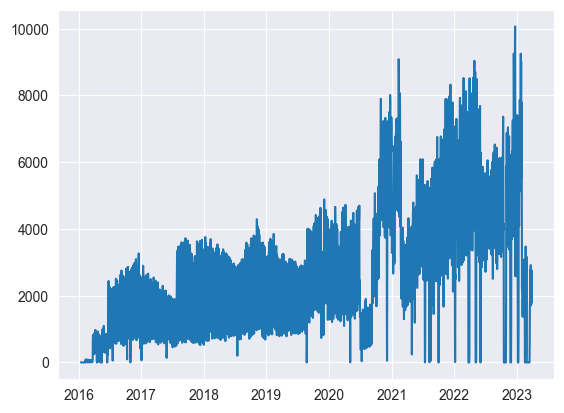

In [59]:
plt.plot(result_df)


Because of change in sourcing of the data after 2020 (2 sources from 2020) there are high inconsistencies, because of that I will focus on years 2017-2020.

In [101]:
df_states = result_df.copy()
count = (df_states['count'] == 0).sum()
print(count)

62


I think it's highly unlikely that no accidents happend in 300 million population. I will treat these values as artifacts.

In [102]:
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2020-01-01')
mask = (df_states.index >= start_date) & (df_states.index <= end_date)

df_states = df_states.loc[mask]


In [103]:
df_states['count'] = df_states['count'].replace(0, np.nan)
count = (df_states['count'] == 0).sum()
print(count)

0


In [104]:
df_states.bfill(inplace=True)

### 1.2 Data visualization

I decided to use basic sns plots to determine the characteristics of dataset.

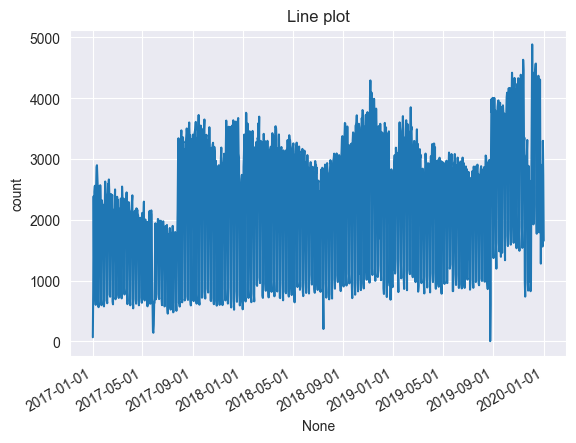

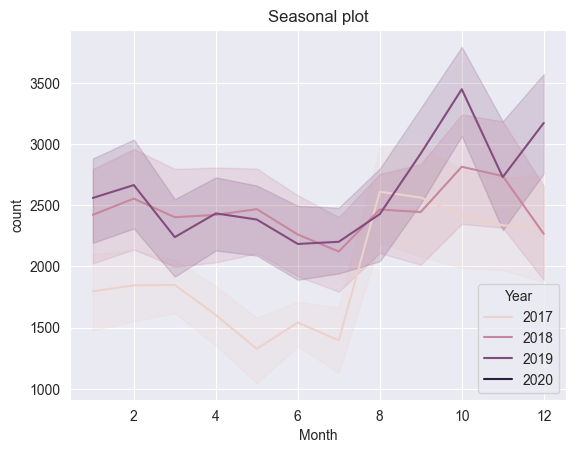

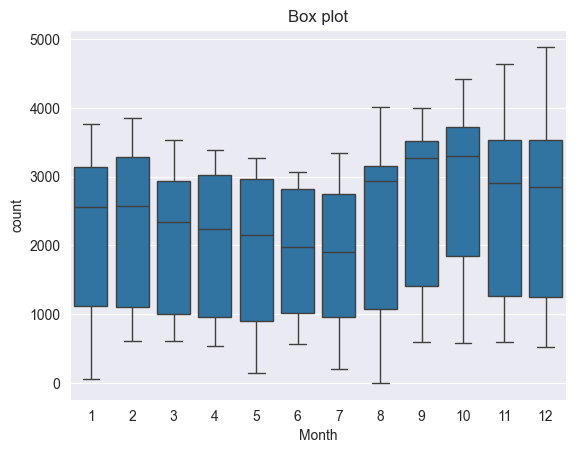

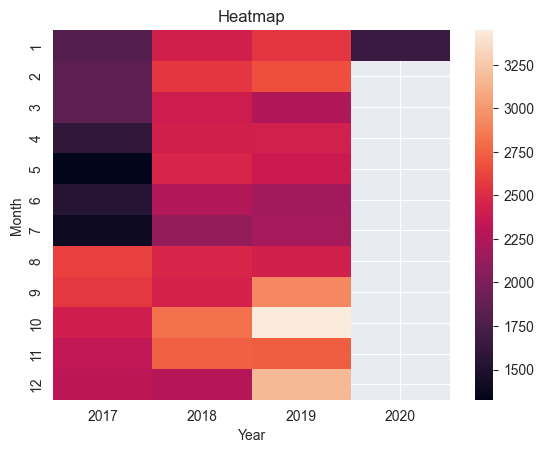

In [64]:
df_states['Year'] = df_states.index.year
df_states['Month'] = df_states.index.month
df_states['Day'] = df_states.index.day
sns.lineplot(data=df_states, x=df_states.index, y='count')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()

plt.title('Line plot')
plt.show()

sns.lineplot(data=df_states, x='Month', y='count', hue='Year')
plt.title('Seasonal plot')
plt.show()

sns.boxplot(data=df_states, x='Month', y='count')
plt.title('Box plot')
plt.show()

pivot_table = df_states.pivot_table(values='count', index='Month', columns='Year')
sns.heatmap(pivot_table)
plt.title('Heatmap')
plt.show()

Based on these visualization we can observe that:
* data shows rising trend 
* years 2018,2019 and 2020 show high seasonality (this is just based on sns seasonality plot but will be explored further)
* data may vary in monthy range highly
* apparently October 2019 had most accidents recorded

1.3 Characteristics of dataset

In [65]:
print(df_states['count'].describe())

count    1096.000000
mean     2342.588504
std      1103.036358
min         2.000000
25%      1081.250000
50%      2743.500000
75%      3200.250000
max      4886.000000
Name: count, dtype: float64


The dataset contains 1096 non-null observations of daily car accidents, with an average of approximately 2342.59 accidents per day. 
  
The number of accidents varies significantly, as indicated by a  **standard deviation of approximately 1103.04.**
  
The data ranges from a minimum of 2 accidents in a day to a maximum of 4886, with 50% of the days having 2743.5 or fewer accidents.

ADF Statistic: -2.941903
p-value: 0.040688


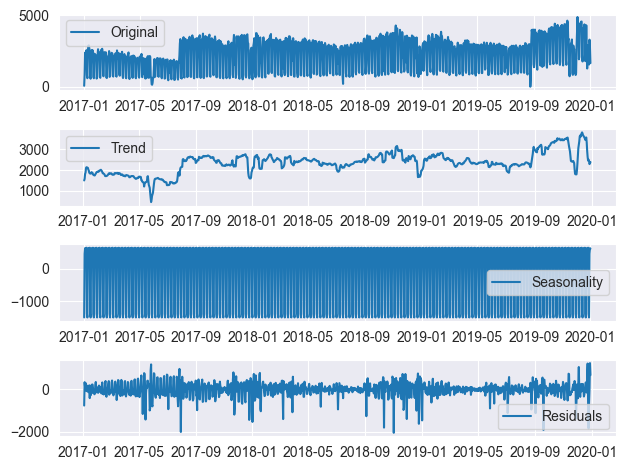

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_states['count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

decomposition = seasonal_decompose(df_states['count'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_states['count'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

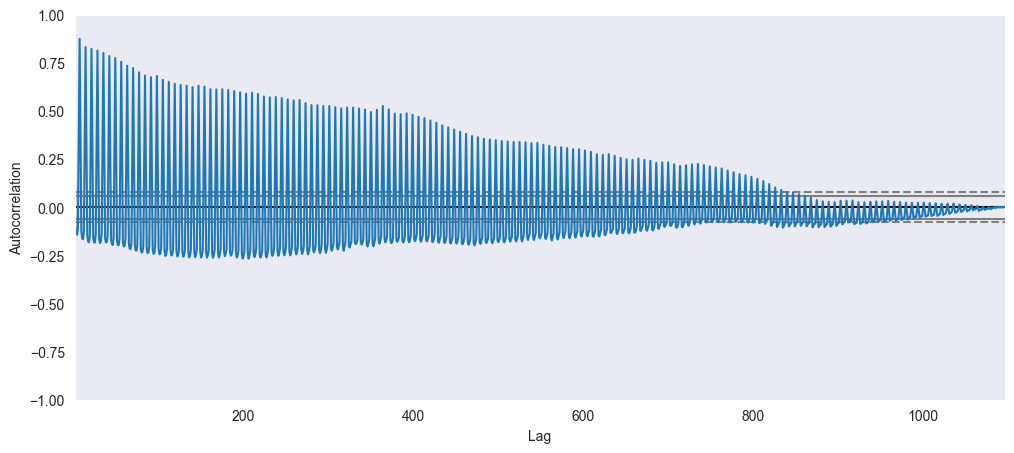

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_states['count'])
plt.show()

Strong weekly seasonality is visible on acf plot.

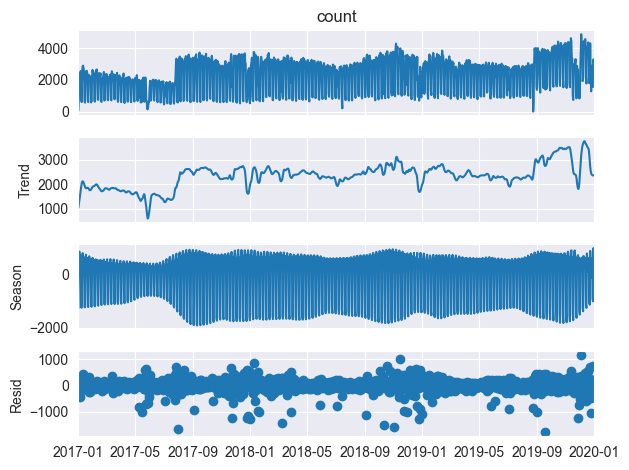

In [68]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_states['count'], seasonal=13)
res = stl.fit()
fig = res.plot()

Frankly the dataset is stationary, null-hypothesis of DF test could be discarded. This leads me to part with model fitting. 

### 1.4 Model fitting 1 - SARIMA

I decided to start with plain SARIMA and check what the MSE result will be. Then I can move to more sophisticated models. I will train models on year 2018. Testing will be performed on first month of 2019.

In [69]:

start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2017-12-31')
mask = (df_states.index >= start_date) & (df_states.index <= end_date)
df_one_year = df_states.loc[mask]
df_one_year = df_one_year.drop(columns=['Year', 'Month', 'Day'])
train = df_one_year

start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2018-01-31')
mask = (df_states.index >= start_date) & (df_states.index <= end_date)
one_month_pred = df_states.loc[mask]
test = one_month_pred


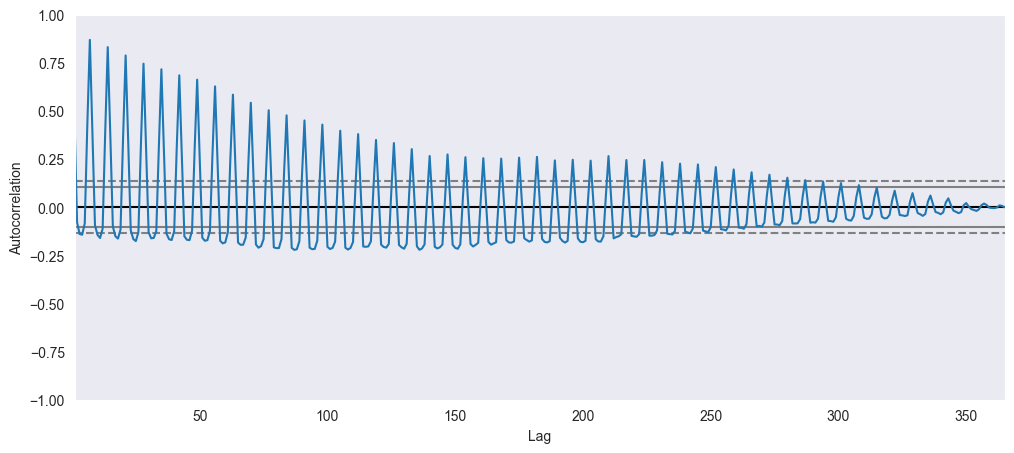

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_one_year['count'])
plt.show()

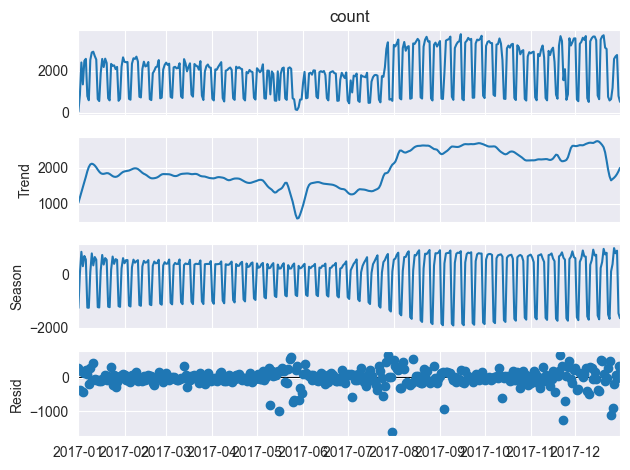

In [71]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_one_year['count'], seasonal=13)
res = stl.fit()
fig = res.plot()

In [72]:
import pmdarima as pm

model = pm.auto_arima(df_one_year, seasonal=True, m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6121.839, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5584.288, Time=0.89 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5827.678, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6119.841, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=6123.840, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=5473.455, Time=0.83 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=5887.874, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=5475.122, Time=1.54 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=5778.653, Time=0.54 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=5495.093, Time=2.19 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5494.541, Time=0.50 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=5454.6

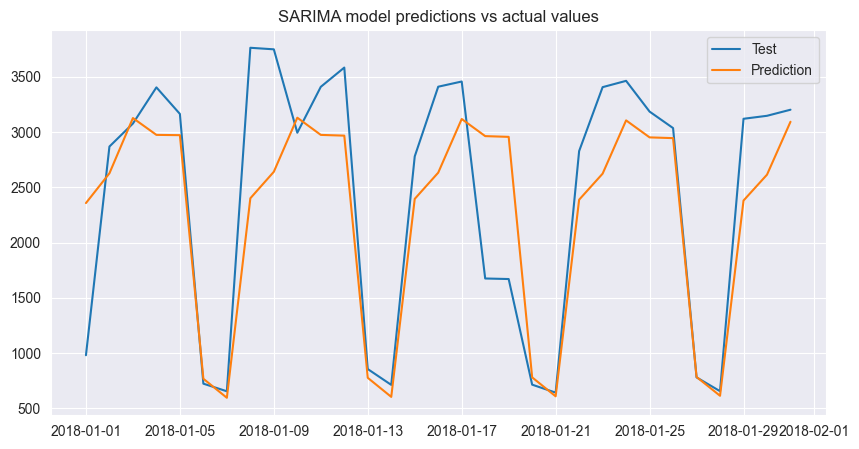

20.43144653527292

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax_1 = SARIMAX(train, order=(4,0,1), seasonal_order=(1,0,1,7)).fit()

predictions = model_sarimax_1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

plt.figure(figsize=(10,5))
plt.plot(test.index, test['count'], label='Test')
plt.plot(test.index, predictions, label='Prediction')
plt.legend(loc='best')
plt.title('SARIMA model predictions vs actual values')
plt.show()
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['count'],predictions)*100

Absolute percantage error == 20.431 is rather high. First of all I will try to fit SARIMA model better, then based on optimal SARIMA parameters I will decide which models I will use for next predictions.

### 1.5 SARIMA with custom grid search

In [74]:
import itertools
import pmdarima as pm
from tqdm import tqdm
# 
# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
# best_aic = np.inf
# best_pdq = None
# best_seasonal_pdq = None
# temp_model = None
# 
# pbar = tqdm(total=len(pdq)*len(seasonal_pdq))
# 
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
# 
#         try:
#             temp_model = pm.auto_arima(df_one_year['count'],
#                                        start_p=param[0],
#                                        d=param[1], 
#                                        start_q=param[2],
#                                        seasonal=True,
#                                        start_P=param_seasonal[0], 
#                                        D=param_seasonal[1], 
#                                        start_Q=param_seasonal[2], 
#                                        m=7,
#                                        trace=False,
#                                        error_action='ignore',
#                                        suppress_warnings=True,
#                                        stepwise=True)  
#             temp_aic = temp_model.aic()
#             if temp_aic < best_aic:
#                 best_aic = temp_aic
#                 best_pdq = param
#                 best_seasonal_pdq = param_seasonal
#         except:
#             continue
#         finally:
#             
#             pbar.update(1)
# 
# pbar.close()
# 
# print("Best SARIMA{}x{}7 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

After this grid search the best fitting model turned out to be:

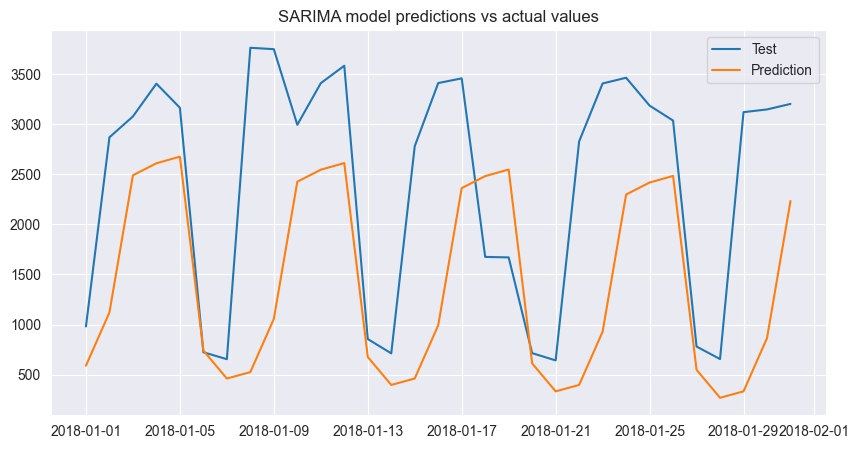

43.50867854086373

In [75]:
model_sarimax_2 = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 0, 7)).fit()
# TODO change sarima parameters based on the fit

predictions_sarimax_2 = model_sarimax_2.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
plt.figure(figsize=(10,5))
plt.plot(test.index, test['count'], label='Test')
plt.plot(test.index, predictions_sarimax_2, label='Prediction')
plt.legend(loc='best')
plt.title('SARIMA model predictions vs actual values')
plt.show()
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['count'],predictions_sarimax_2)*100

Unfortunatelly the grid search was not successfull. Now I will try fitting SARIMAX with exog values being weekends and holidays. Because possible smaller traffic on weekends I suppose that exog might be faulty. Therefore I will fit holidays separately.

### 1.6 Exogenous values

In [76]:
import holidays

df_states['is_weekend'] = df_states.index.dayofweek >= 5

us_holidays = holidays.US(years=[2017, 2018, 2019, 2020])
us_holidays = pd.to_datetime([date for date in us_holidays.keys()]) 
df_states['is_holiday'] = df_states.index.normalize().isin(us_holidays)

df_states[['is_weekend', 'is_holiday']] = df_states[['is_weekend', 'is_holiday']].astype(int)

df_exog_both = df_states[['is_holiday', 'is_weekend']]
df_exog_holidays = df_states[['is_holiday']]

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax_exog_both = SARIMAX(train, exog=df_exog_both.loc[train.index], order=(4,0,1), seasonal_order=(1,0,1,7)).fit()

model_sarimax_exog_holidays = SARIMAX(train, exog=df_exog_holidays.loc[train.index], order=(4,0,1), seasonal_order=(1,0,1,7)).fit()

C:\Users\Domin\PycharmProjects\TSA_project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
from sklearn.metrics import mean_squared_error

predictions_exog_both = model_sarimax_exog_both.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True, exog=df_exog_both.loc[test.index])
predictions_exog_holidays = model_sarimax_exog_holidays.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True, exog=df_exog_holidays.loc[test.index])

mae_exog_both = mean_absolute_percentage_error(test['count'], predictions_exog_both)
mae_exog_holidays = mean_absolute_percentage_error(test['count'], predictions_exog_holidays)

print(f"MAE for the model with both holidays and weekends as exogenous variables: {mae_exog_both*100}")
print(f"MAE for the model with only holidays as exogenous variables: {mae_exog_holidays*100}")

MAE for the model with both holidays and weekends as exogenous variables: 29.248460415684885
MAE for the model with only holidays as exogenous variables: 24.79670377107472


Based on that I can assume that weekends don't play as crucial part as expected. Also holidays used as exog values didn't improve fit, therefore they must not be relevant. 

### 1.7 Holt Winters Exponential Smoothing

In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_ets = ExponentialSmoothing(train['count'], trend='add', seasonal='add', seasonal_periods=7).fit()


### 1.8 Random For

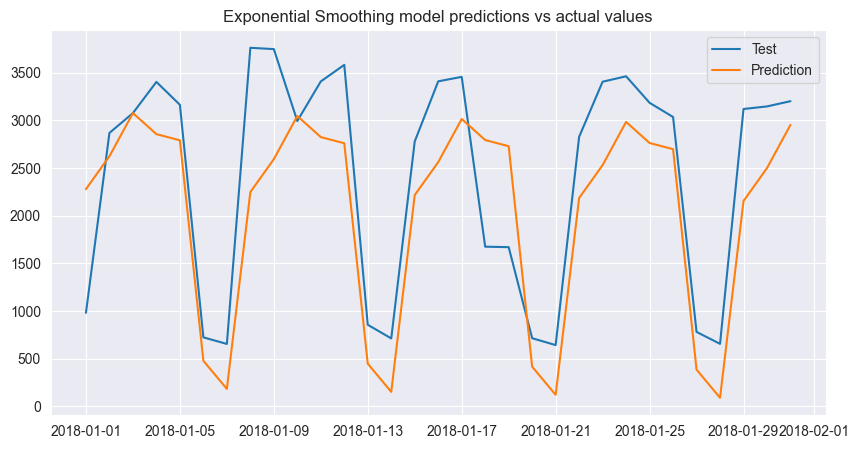

MAPE for Exponential Smoothing model: 35.72%


In [82]:
predictions_ets = model_ets.forecast(len(test))
plt.figure(figsize=(10,5))
plt.plot(test.index, test['count'], label='Test')
plt.plot(test.index, predictions_ets, label='Prediction')
plt.legend(loc='best')
plt.title('Exponential Smoothing model predictions vs actual values')
plt.show()
mape_ets = mean_absolute_percentage_error(test['count'], predictions_ets) * 100
print(f'MAPE for Exponential Smoothing model: {mape_ets:.2f}%')

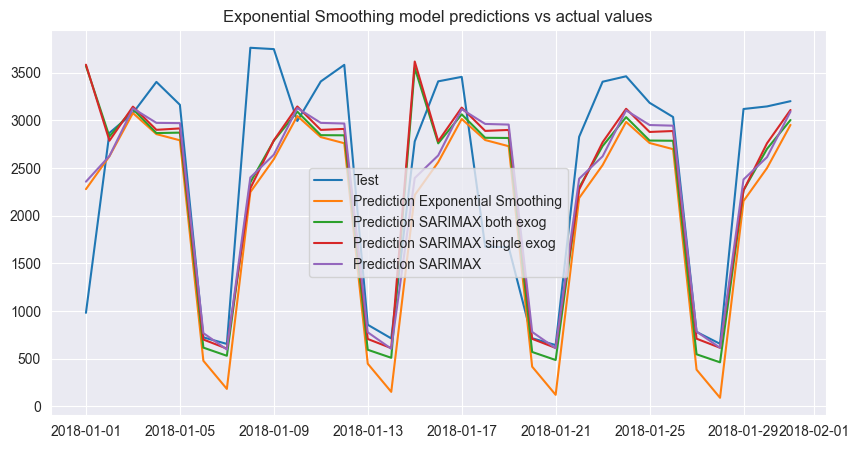

In [83]:
plt.figure(figsize=(10,5))
plt.plot(test.index, test['count'], label='Test')
plt.plot(test.index, predictions_ets, label='Prediction Exponential Smoothing')
plt.plot(test.index, predictions_exog_both, label='Prediction SARIMAX both exog')
plt.plot(test.index, predictions_exog_holidays, label='Prediction SARIMAX single exog')
plt.plot(test.index, predictions, label='Prediction SARIMAX')
plt.legend(loc='best')
plt.title('Exponential Smoothing model predictions vs actual values')
plt.show()

## Part 2 - data exploration
Now I will focus on finding the relations between data and gathering insights about car accidents in United States.

### 2.1 Localisation
#### 2.1.1 State with most accidents

Firstly I will prepare the dataset for my needs.

In [84]:
df_states = df1.copy()
df_states.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [85]:
df_states['Start_Time'] = pd.to_datetime(df_states['Start_Time'], format='mixed',errors='coerce')
df_states['End_Time'] = pd.to_datetime(df_states['End_Time'], format='mixed',errors='coerce')

df_states.set_index('Start_Time', inplace=True)
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2020-12-31')

df_states = df_states[df_states.index.date >= start_date.date()]
df_states = df_states[df_states.index.date <= end_date.date()]

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\3710583332.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_states.index, y=top_states.values, palette='bright')


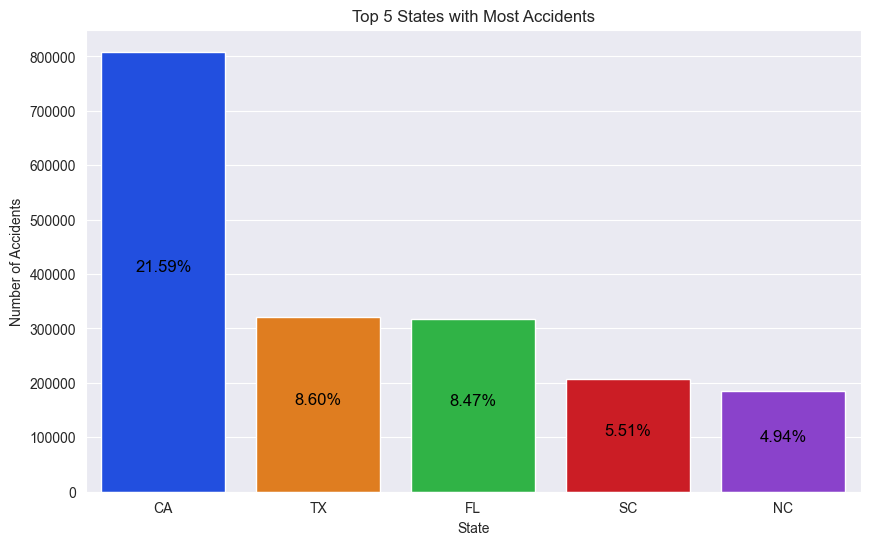

In [86]:
import seaborn as sns

state_accidents = df_states['State'].value_counts()
total_accidents = state_accidents.sum()
top_states = state_accidents.head(5)
percentages = (top_states / total_accidents) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_states.index, y=top_states.values, palette='bright')

for i in range(top_states.shape[0]):
    ax.text(i, top_states.iloc[i]/2, f'{percentages.iloc[i]:.2f}%', ha='center', color='black', fontsize=12)

plt.title('Top 5 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

Apparently California is the state with most accidents aprox. 22% of all accidents in United States happened in California.

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')


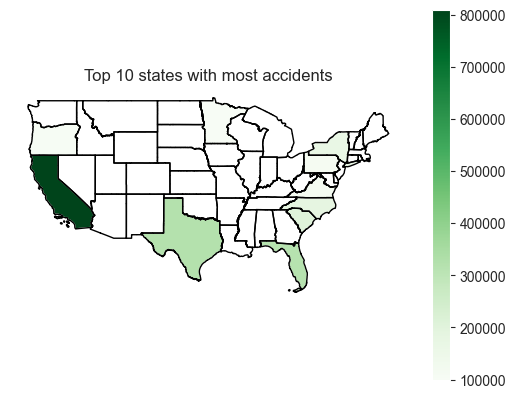

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

us_map = gpd.read_file('tl_2018_us_state.shp')
print(us_map.columns)
# 
us_map['STUSPS'] = us_map['STUSPS'].str.upper()
state_accidents = df_states['State'].value_counts()
state_accidents_df = pd.DataFrame({'State':state_accidents.index, 'Accidents':state_accidents.values})
merged = us_map.set_index('STUSPS').join(state_accidents_df.set_index('State'))

top_10_states = state_accidents_df['State'].head(10)


# List of continental US states abbreviations
continental_us_states = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
                         'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
                         'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 
                         'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 
                         'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                         'WV', 'WI', 'WY']


merged = merged[merged.index.isin(continental_us_states)]
fig, ax = plt.subplots(1, 1)
us_map[us_map['STUSPS'].isin(continental_us_states)].boundary.plot(ax=ax, linewidth=1, color='black')

merged.loc[top_10_states].plot(column='Accidents', ax=ax, legend=True, cmap='Greens')
plt.title("Top 10 states with most accidents")
ax.axis('off')
plt.show()


#### 2.1.2 City with most accidents

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\1791117144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='bright')


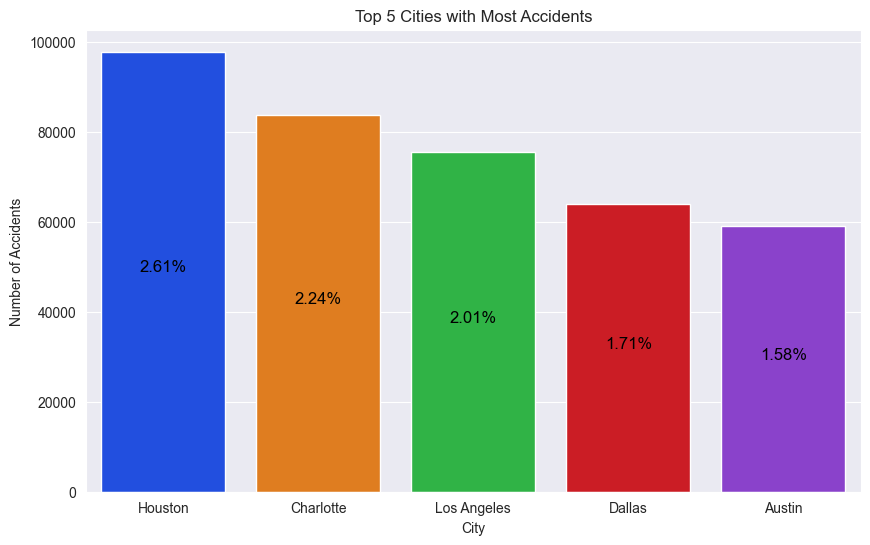

In [88]:
city_accidents = df_states['City'].value_counts()
top_cities = city_accidents.head(5)

city_percentages = (top_cities / total_accidents) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette='bright')

for i in range(top_cities.shape[0]):
    ax.text(i, top_cities.iloc[i]/2, f'{city_percentages.iloc[i]:.2f}%', ha='center', color='black', fontsize=12)

plt.title('Top 5 Cities with Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

plt.show()

#### 2.1.2 Street with most accidents


C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\1369615238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_streets.index, y=top_streets.values, palette='bright')


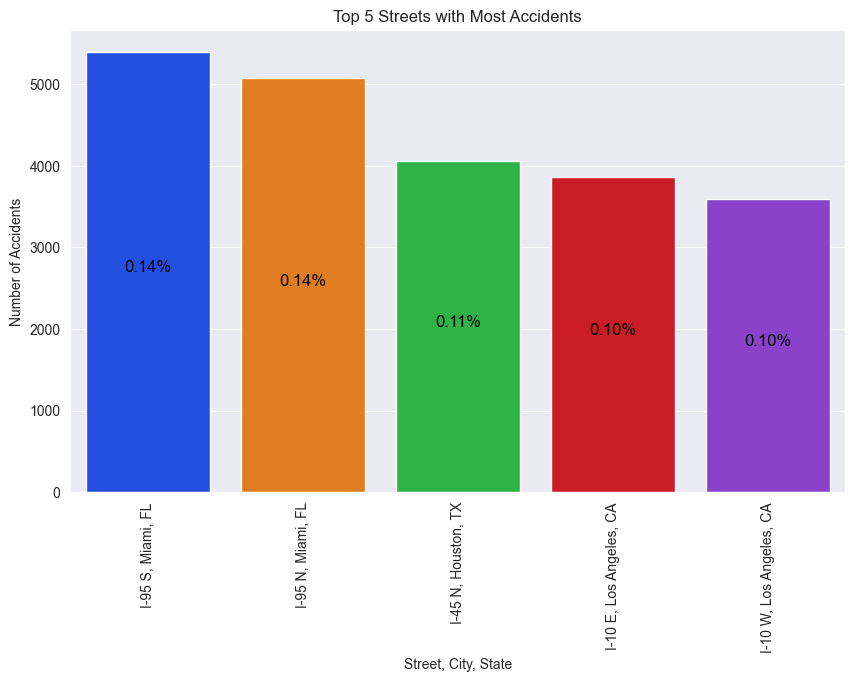

In [89]:
df_states['Street_City_State'] = df_states['Street'] + ', ' + df_states['City'] + ', ' + df_states['State']
street_accidents = df_states['Street_City_State'].value_counts()
top_streets = street_accidents.head(5)
street_percentages = (top_streets / total_accidents) * 100


plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_streets.index, y=top_streets.values, palette='bright')

for i in range(top_streets.shape[0]):
    ax.text(i, top_streets.iloc[i]/2, f'{street_percentages.iloc[i]:.2f}%', ha='center', color='black', fontsize=12)

plt.title('Top 5 Streets with Most Accidents')
plt.xlabel('Street, City, State')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=90) 

plt.show()

"I-95 is a major Interstate Highway in the United States. It runs from Miami, Florida, to Houlton, Maine. In the Miami area, it is often referred to as the I-95 Express. It is a major thoroughfare for traffic in the Miami metropolitan area"

#### 2.1.2 State with least amount of accidents


Now I decided to focus on least amount of accidents.

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\4230329482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_states.index, y=bottom_states.values, palette='bright')


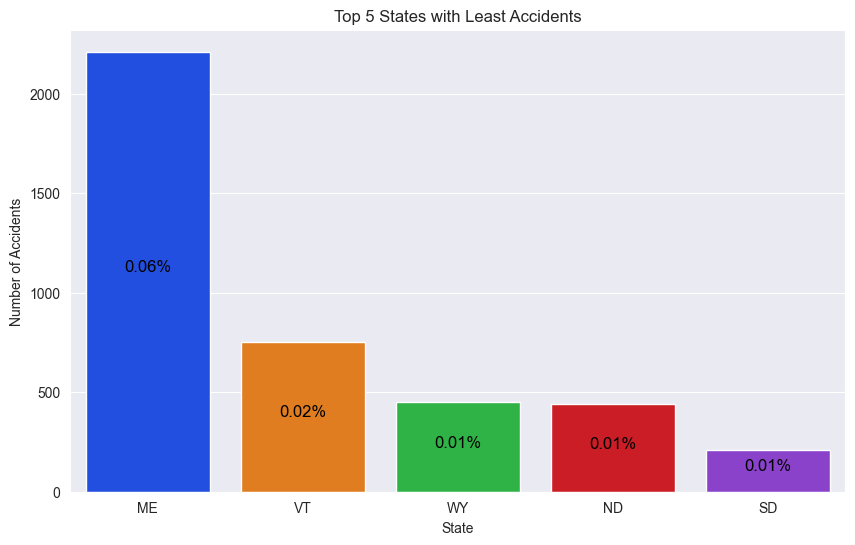

In [90]:

state_accidents = df_states['State'].value_counts()
total_accidents = state_accidents.sum()

bottom_states = state_accidents.tail(5)
percentages = (bottom_states / total_accidents) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x=bottom_states.index, y=bottom_states.values, palette='bright')

for i in range(bottom_states.shape[0]):
    ax.text(i, bottom_states.iloc[i]/2, f'{percentages.iloc[i]:.2f}%', ha='center', color='black', fontsize=12)

plt.title('Top 5 States with Least Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

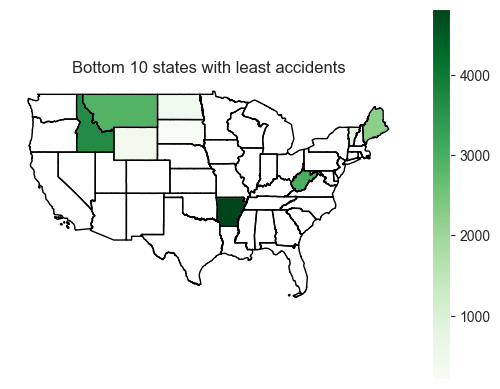

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt

us_map = gpd.read_file('tl_2018_us_state.shp')

us_map['STUSPS'] = us_map['STUSPS'].str.upper()
state_accidents = df_states['State'].value_counts()
state_accidents_df = pd.DataFrame({'State':state_accidents.index, 'Accidents':state_accidents.values})
merged = us_map.set_index('STUSPS').join(state_accidents_df.set_index('State'))
bottom_10_states = state_accidents_df['State'].tail(10)

merged = merged[merged.index.isin(continental_us_states)]

fig, ax = plt.subplots(1, 1)

us_map[us_map['STUSPS'].isin(continental_us_states)].boundary.plot(ax=ax, linewidth=1, color='black')

if 'DC' in merged.index:
    merged.loc[bottom_10_states].plot(column='Accidents', ax=ax, legend=True, cmap='Greens')
else:
    bottom_10_states = bottom_10_states[bottom_10_states != 'DC']
    merged.loc[bottom_10_states].plot(column='Accidents', ax=ax, legend=True, cmap='Greens')
    
plt.title("Bottom 10 states with least accidents")
ax.axis('off')
plt.show()

#### 2.1.2 City with least amount of accidents


In [92]:
city_state_accidents = df_states.groupby(['City', 'State']).size()

bottom_cities = city_state_accidents.nsmallest(10)

bottom_cities_df = bottom_cities.reset_index()

bottom_cities_df.columns = ['City', 'State', 'Accidents']

print(bottom_cities_df)

                      City State  Accidents
0                Abbeville    MS          1
1                 Aberdeen    ID          1
2  Aberdeen Proving Ground    MD          1
3                  Abiquiu    NM          1
4                     Acra    NY          1
5                    Acton    ME          1
6                  Acworth    NH          1
7                     Adah    PA          1
8                Adamsburg    PA          1
9                     Addy    WA          1


#### 2.1.2 Street with least amount of accidents


In [93]:
street_accidents = df_states['Street_City_State'].value_counts()

bottom_streets = street_accidents.tail(5)

bottom_streets_df = bottom_streets.reset_index()

bottom_streets_df.columns = ['Street, City, State', 'Accidents']

print(bottom_streets_df)

               Street, City, State  Accidents
0  W St Clair St, Indianapolis, IN          1
1      Alexia Dr, Indianapolis, IN          1
2         Weller Dr, Bellbrook, OH          1
3    Township Road 49, Findlay, OH          1
4       Thompson Rd, Yuba City, CA          1


### 2.2 Time realted exploration


C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\3773688932.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_accidents.index, y=year_accidents.values, palette='bright')


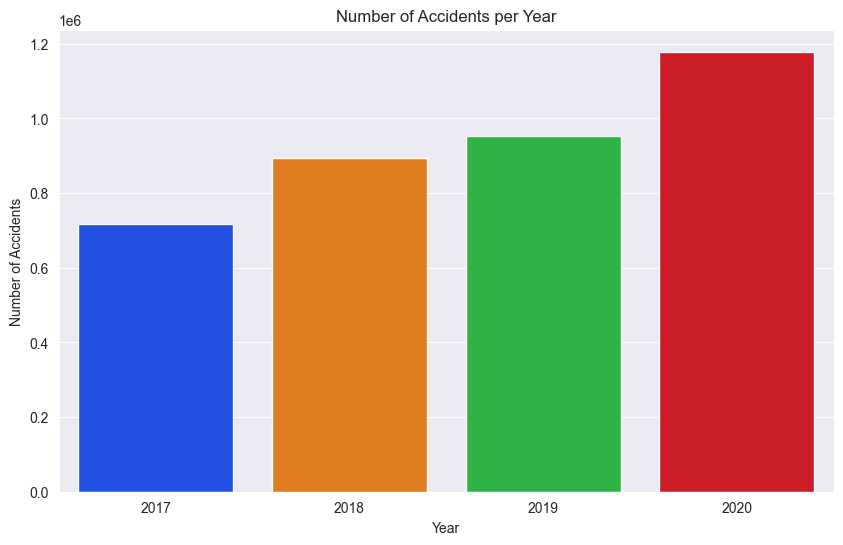

The year with the most accidents is: 2020


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

year_accidents = df_states.groupby(df_states.index.year).size()
max_year = year_accidents.idxmax()

plt.figure(figsize=(10,6))
sns.barplot(x=year_accidents.index, y=year_accidents.values, palette='bright')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print(f"The year with the most accidents is: {max_year}")




A rising trend is visible on this bar graph.

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\2844804514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_accidents.index, y=month_accidents.values, palette='bright')


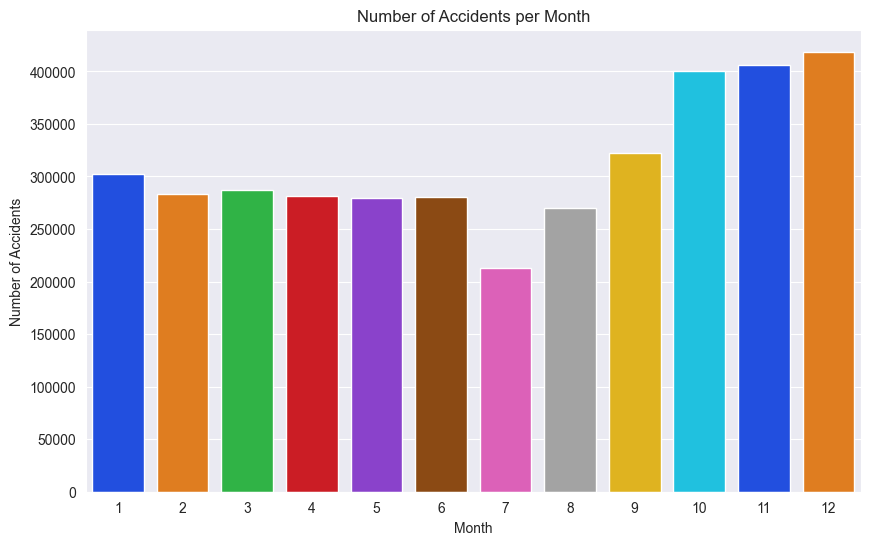

In [95]:
month_accidents = df_states.groupby(df_states.index.month).size()
max_month = month_accidents.idxmax()

plt.figure(figsize=(10,6))
sns.barplot(x=month_accidents.index, y=month_accidents.values, palette='bright')
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

Apparently December is the most dangerous month. Maybe because of more people traveling with regard to Holidays and New Years Eve?

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\2757247260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_accidents.index, y=day_accidents.values, palette='bright')


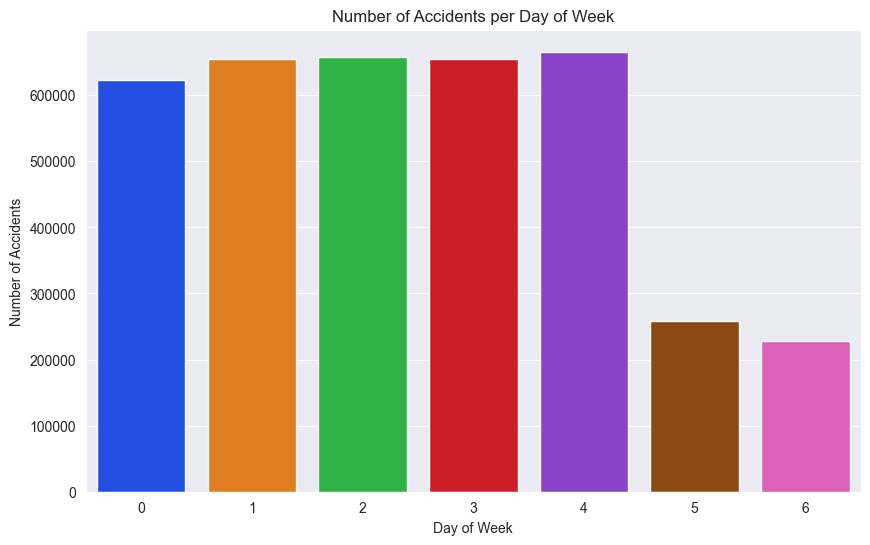

In [96]:
# Monday=0, Sunday=6
day_accidents = df_states.groupby(df_states.index.dayofweek).size()
max_day = day_accidents.idxmax()

plt.figure(figsize=(10,6))
sns.barplot(x=day_accidents.index, y=day_accidents.values, palette='bright')
plt.title('Number of Accidents per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()


Most accidents happen on thursdays. I suppose it is because of 

C:\Users\Domin\AppData\Local\Temp\ipykernel_10012\2211497137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_accidents.index, y=hour_accidents.values, palette='bright')


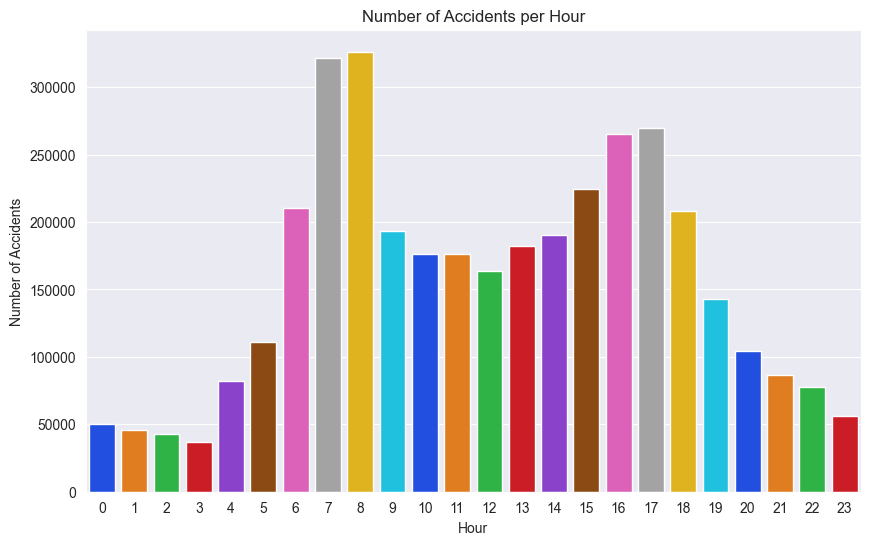

In [97]:
hour_accidents = df_states.groupby(df_states.index.hour).size()
max_hour = hour_accidents.idxmax()

plt.figure(figsize=(10,6))
sns.barplot(x=hour_accidents.index, y=hour_accidents.values, palette='bright')
plt.title('Number of Accidents per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

## 3 Conclusions

First part showed that SARIMA model was relatively good choice for this dataset. Unfortunately I was not able to perform more advanced grid search due to technological limitations. Based on the first part of my analysis I conclude, that count of accidents was not dependent on presence of holidays / weekends. More detailed grid search may reveal a better fitting model.  

A good continuation would be applying XGBoost or exponential smoothing models to verify their fit to the data.


Second part showed interesting infromation about car accidents in United States. I gathered insight about:
    * State, city, street with most accidents.
    * Which state/city/street/part_of_us had least amount of accidents
    * Which year had most accidents?
    * Which month had most accidents on average?
    * Which day of the week had most accidents?
    * In which our most accidents occur?
    * Do holidays / weekends affect the number of accidents?
